#Regularization - #Technique to battle over-fitting.
###### Ridge - too many predictors and contribution is low.
###### Lasso - small number of predictors but the influnce is large.

##### Performance evaluation for regression:
###### RMSE
###### MSE
###### MAE
###### R^2

#### Performance evaluation for classification.
###### Precission
###### Recall
###### F1
###### Acc
###### ROC
###### AUC
###### KS


RSS = Sum of squares of the error.

In [267]:

from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import pandas as pd

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

import plotly_express as plte
import seaborn as sns

from sklearn.datasets import load_iris

In [268]:
calhousing = fetch_california_housing()
df = pd.DataFrame(calhousing.data)
df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [269]:
features = calhousing.data[:, 0:2]
print(features)

[[ 8.3252 41.    ]
 [ 8.3014 21.    ]
 [ 7.2574 52.    ]
 ...
 [ 1.7    17.    ]
 [ 1.8672 18.    ]
 [ 2.3886 16.    ]]


In [270]:
target = calhousing.target

In [271]:
regression = LinearRegression()

In [272]:
model = regression.fit(features, target)

In [273]:
model.intercept_

-0.1018903275908265

In [274]:
model.coef_

array([0.43169191, 0.01744134])

# Splitting it into train_test and finding the r2 score

In [275]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [276]:
model.fit(X_train, y_train)

LinearRegression()

In [277]:
y_pred = model.predict(X_test)
print(y_test.shape)
print(y_pred.shape)

(4128,)
(4128,)


In [278]:
r2_score(y_test, y_pred)

0.4940606792889837

In [279]:
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features)

# Splitting it into train_test and finding the r2 score after using Polynomial features

In [280]:
X_train, X_test, y_train, y_test = train_test_split(features_interaction, target, test_size=0.2, random_state=42)

In [281]:
regression = LinearRegression()
model = regression.fit(X_train, y_train)

In [282]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.4941556956143536

In [283]:
y_train_pred = model.predict(X_train)
r2_score(y_train, y_train_pred)

0.513509994906462

In [284]:
interaction = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = interaction.fit_transform(features)

# Splitting it into train_test and finding the r2 score after removing interaction params.

In [285]:
X_train, X_test, y_train, y_test = train_test_split(features_polynomial, target, test_size=0.2, random_state=42)

In [286]:
regression = LinearRegression()
model = regression.fit(X_train, y_train)

In [287]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.5184788432189643

In [288]:
y_train_pred = model.predict(X_train)
r2_score(y_train, y_train_pred)

0.5438176798271874

### Using Ridge regularization.

In [289]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.5)
model = ridge.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

y_train_pred = model.predict(X_train)
print(r2_score(y_train, y_train_pred))

print(regression.coef_)

0.49406085223819896
0.512778797809636
[-2.97966174e-01 -1.53672803e-02  9.53904090e-02  1.67698773e-02
 -8.27727035e-04 -3.96952404e-03 -9.27099541e-04 -5.83276016e-05
  1.62451237e-05]


In [290]:
regression = RidgeCV(alphas=[0.1, 0.5, 1.0, 2.5, 5.0, 7.5, 10.0])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = regression.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(r2_score(y_test, y_pred))

y_train_pred = model.predict(X_train)
print(r2_score(y_train, y_train_pred))

print(regression.coef_)

0.49406412399479294
0.5127787834007568
[0.43334932 0.01748432]


In [291]:
!pip install plotly.express


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [306]:
iris_data = plte.data.iris()
df = pd.DataFrame(iris_data)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [307]:
figure = plte.scatter(df, x='sepal_length', y='petal_length', color='species')
figure.show()

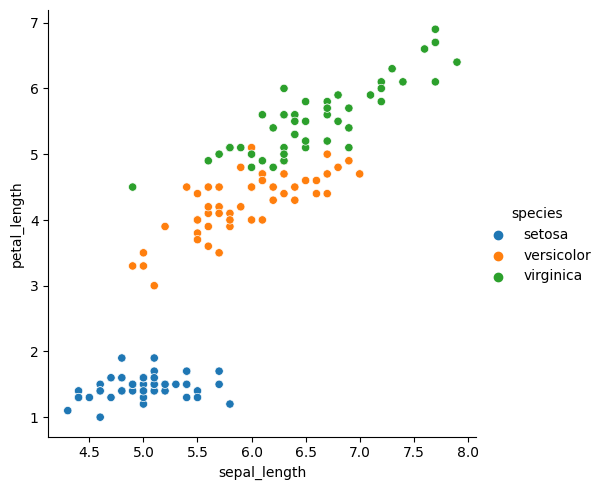

In [310]:
sns.relplot(df, x='sepal_length', y='petal_length', hue='species')

In [304]:
tips = sns.load_dataset('tips')

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

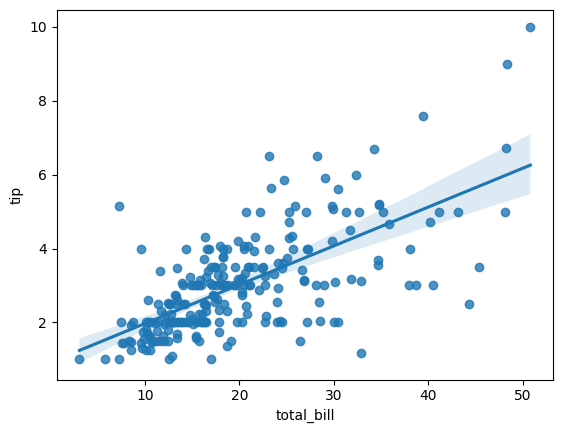

In [312]:
sns.regplot(x='total_bill', y='tip', data=tips)

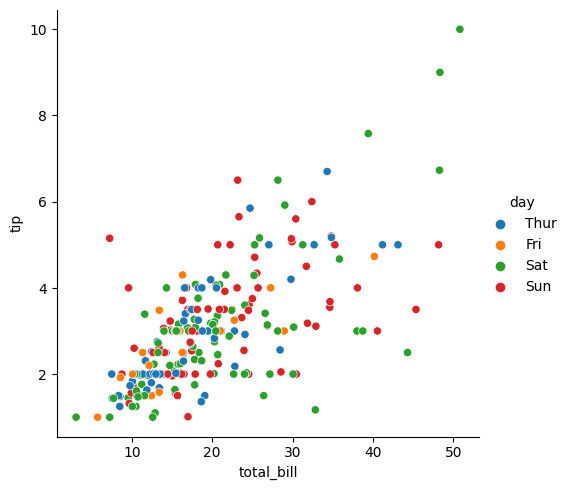

In [314]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='day')

In [316]:
fig = plte.scatter(tips, x="total_bill", y="tip", trendline="ols")
fig.show()